/home/cartolab3/.config/matplotlib
  Condition  MSLS-val  Tokyo24/7  Pitts30k   SPED
0   w/o HBM     88.24      87.62     90.83  89.62
1    w/ HBM     89.51      91.75     92.20  91.44


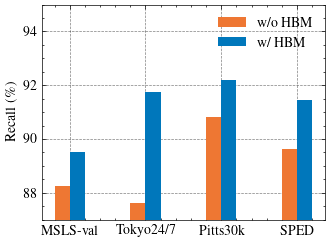

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots
import matplotlib

print(matplotlib.get_configdir())

df=pd.read_excel('tmp_files/loss_function.xlsx')
print(df.head())

# 设置图表样式
with plt.style.context(['science', 'grid','vibrant']):
    # 读取所有sheet的数据
    excel_file = 'tmp_files/loss_function.xlsx'
    all_sheets = pd.read_excel(excel_file, sheet_name=None)
    
    # 获取sheet数量
    n_sheets = len(all_sheets)
    
    # 创建子图布局
    fig, axes = plt.subplots(n_sheets, 1)
    if n_sheets == 1:
        axes = [axes]
    
    # 为每个数据集创建一个子图
    for idx, (sheet_name, df) in enumerate(all_sheets.items()):
        ax = axes[idx]
        
        # 设置柱状图的位置
        x = np.arange(len(df.columns)-1)  # 减1是因为第一列是条件名
        width = 0.2
        
        # 绘制两组柱状图
        ax.bar(x - width/2, df.iloc[0, 1:], width, label='w/o HBM')
        ax.bar(x + width/2, df.iloc[1, 1:], width, label='w/ HBM')
        
        # 设置y轴范围从60开始
        ax.set_ylim(87, 95)  # 添加这行代码

        # 设置x轴标签
        ax.set_xticks(x)
        ax.set_xticklabels(df.columns[1:], rotation=0)
        
        # 添加标题和标签
        ax.set_ylabel('Recall (\\%)')
        
        # 添加图例
        ax.legend(frameon=False)
    
    # 调整布局
    plt.tight_layout()
    plt.savefig('images/loss_function.png',dpi=600)
    
    # 显示图形
    plt.show()
   
